###### <center><span style="font-family:Georgia; font-size:3em;"> ***xG Model*** </span></center>

In [388]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as patches
import FCPython 

import seaborn as sns
from sklearn.model_selection import train_test_split
pd.set_option("display.max_columns", None)
# pd.set_option("display.max_rows", None)

# extract the data
data = pd.read_excel("shots_for_xg_model.xlsx")

In [389]:
data.describe()

,period_id,min,sec,x,y
count,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000
mean,1.569080,49.366520,29.400520,84.687972,50.476090
std,0.563058,26.840778,17.377921,7.823852,12.808797
min,1.000000,0.000000,0.000000,30.600000,1.500000
25%,1.000000,27.000000,14.000000,78.200000,41.400000
50%,2.000000,50.000000,29.000000,86.400000,50.100000
75%,2.000000,72.000000,44.000000,90.900000,59.800000
max,5.000000,130.000000,59.000000,99.900000,98.500000


In [390]:
data.head()

,period_id,min,sec,x,y,volley,first_touch,head,left_footed,right_footed,1_on_1,regular_play,penalty,free_kick,set_piece,from_corner,is_goal
0,1,4,26,73.2,21.9,False,True,False,False,True,False,True,False,False,False,False,False
1,1,8,8,73.3,27.7,False,False,False,False,True,False,True,False,False,False,False,False
2,1,13,24,70.9,49.1,False,False,False,True,False,False,True,False,False,False,False,False
3,1,11,40,74.7,32.4,False,False,False,True,False,False,False,False,True,False,False,False
4,1,19,11,72.3,36.6,False,True,False,True,False,False,False,False,False,False,True,False


In [278]:
print(len(data[(data['1_on_1'] == 1)&(data['is_goal'] == 1)])/len(data[data['1_on_1'] == 1]))
len(data[(data['1_on_1'] == 1)&(data['is_goal'] == 0)])/len(data[data['1_on_1'] == 1])

0.3641207815275311


0.6358792184724689

###### <span style="font-family:Georgia; font-size:2em;"> ***Creation of Variables*** </span>

In [391]:
## create a feature distance to goal
data['distance_to_goal'] = ((data['x'] - 100)**2 + (data['y'] - 50)**2)**0.5

## angle to goal (posts)
a2 = ((data['x'] - 100)**2 + (data['y'] - 46.35)**2)
c2 = ((data['x'] - 100)**2 + (data['y'] - 53.65)**2)
data['angle_to_goal'] = np.degrees(np.arccos((a2 + c2 - (7.3)**2)/(2*(a2**0.5)*(c2**0.5))))

## on good foot

data['on_good_foot'] = np.where((data['right_footed'] == 1) & (data['y'] <= 50), 1, 0)
data['on_good_foot'] = np.where((data['left_footed'] == 1) & (data['y'] > 50), 1, data['on_good_foot'])


data.sort_values(by = 'angle_to_goal', ascending = True).head(10)

,period_id,min,sec,x,y,volley,first_touch,head,left_footed,right_footed,1_on_1,regular_play,penalty,free_kick,set_piece,from_corner,is_goal,distance_to_goal,angle_to_goal,on_good_foot
42225,2,69,59,99.9,62.4,True,True,False,False,True,False,True,False,False,False,False,False,12.400403,0.297802,0
44570,2,90,56,99.6,30.1,False,False,False,False,True,False,True,False,False,False,False,False,19.904020,0.436990,1
6470,2,54,57,98.6,85.7,False,False,False,False,True,False,True,False,False,False,False,False,35.727440,0.463572,0
18729,2,88,25,99.4,69.4,False,False,False,True,False,False,True,False,False,False,False,False,19.409276,0.690548,1
18185,2,83,28,98.0,16.3,False,False,False,True,False,False,False,False,True,False,False,False,33.759295,0.742628,0
34803,2,76,56,99.4,32.4,False,True,False,False,True,False,False,False,False,False,False,False,17.610224,0.845483,1
24656,1,6,48,99.3,68.0,False,False,False,True,False,False,True,False,False,False,False,False,18.013606,0.940828,1
28896,2,55,15,97.8,81.4,False,False,False,False,True,False,False,False,True,False,False,False,31.476976,0.941288,0
25811,1,40,37,96.2,9.3,False,False,False,True,False,False,False,False,True,False,False,False,40.877011,0.958753,0
13405,1,12,0,99.3,32.4,False,False,False,False,True,False,True,False,False,False,False,False,17.613915,0.985939,1


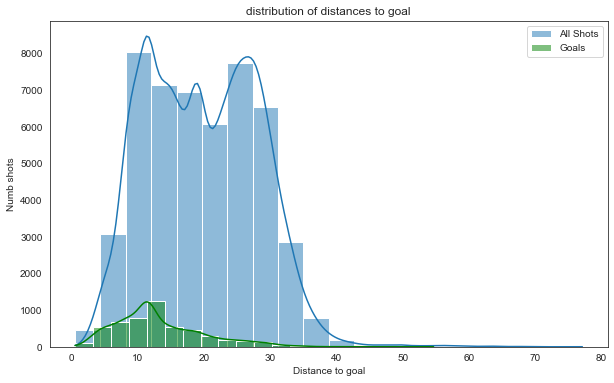

/Users/thomassinapi/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


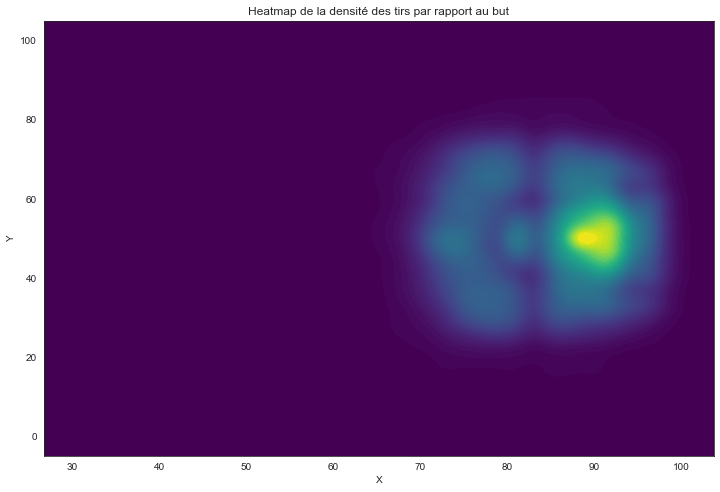

In [361]:
# Histogram of distribution of distances to goal
plt.figure(figsize=(10, 6))
sns.histplot(data['distance_to_goal'], bins=20, kde=True, label='All Shots')
sns.histplot(data[data['is_goal'] == 1]['distance_to_goal'], bins=20, kde=True, label='Goals', color='green')
plt.title('distribution of distances to goal')
plt.xlabel('Distance to goal')
plt.ylabel('Numb shots')
plt.legend()
plt.show()

# Heatmap of shot density in relation to the goal
plt.figure(figsize=(12, 8))
sns.kdeplot(data['x'], data['y'], cmap='viridis', fill=True, thresh=0, levels=100)
plt.title('Heatmap de la densité des tirs par rapport au but')
plt.xlabel('X')
plt.ylabel('Y')
plt.show()


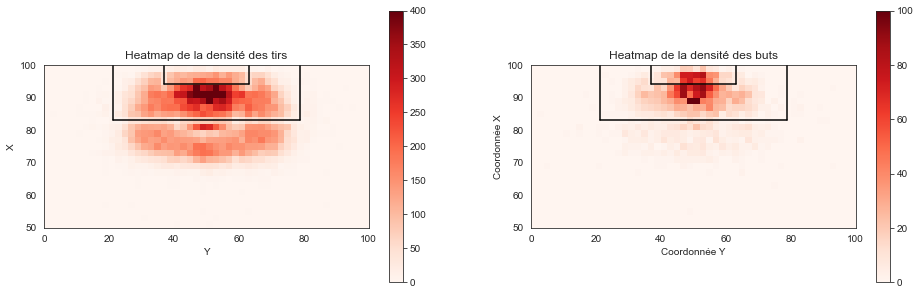

<ipython-input-367-b67c430d707a>:42: RuntimeWarning: invalid value encountered in divide
  pos=ax.imshow(H_Goal[0]/H_Shot[0],extent=[0,100,0,100],origin='lower',cmap=plt.cm.Reds,vmin=0,vmax=0.5)


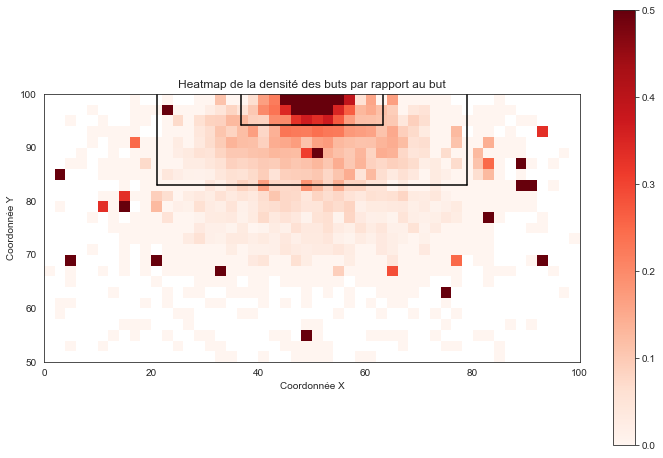

In [367]:
H_Shot=np.histogram2d(data['x'], data['y'],bins=50,range=[[0, 100],[0, 100]])
goals_only=data[data['is_goal']==1]
H_Goal=np.histogram2d(goals_only['x'], goals_only['y'],bins=50,range=[[0, 100],[0, 100]])

fig, axs = plt.subplots(1, 2, figsize=(16, 5))

# Heatmap of shot density
pos = axs[0].imshow(H_Shot[0], extent=[0, 100, 0, 100], origin='lower', cmap=plt.cm.Reds, vmin=0, vmax=400)
fig.colorbar(pos, ax=axs[0])
axs[0].set_title('Heatmap de la densité des tirs')
axs[0].set_xlabel('Y')
axs[0].set_ylabel('X')
axs[0].set_xlim(0, 100)
axs[0].set_ylim(50, 100)
axs[0].plot( [21.1, 21.1],[83, 100], color="black")
axs[0].plot([78.9, 78.9],[83, 100], color="black")
axs[0].plot( [21.1, 78.9], [83, 83],color="black")
axs[0].plot( [36.8, 36.8], [100, 94.2],color="black")
axs[0].plot([36.8, 63.2],[94.2, 94.2],  color="black")
axs[0].plot( [63.2, 63.2],[94.2, 100], color="black")


# Heatmap Goal density
pos = axs[1].imshow(H_Goal[0], extent=[0, 100, 0, 100], origin='lower', cmap=plt.cm.Reds, vmin=0, vmax=100)
fig.colorbar(pos, ax=axs[1])
axs[1].set_title('Heatmap de la densité des buts')
axs[1].set_xlabel('Coordonnée Y')
axs[1].set_ylabel('Coordonnée X')
axs[1].set_xlim(0, 100)
axs[1].set_ylim(50, 100)
axs[1].plot( [21.1, 21.1],[83, 100], color="black")
axs[1].plot([78.9, 78.9],[83, 100], color="black")
axs[1].plot( [21.1, 78.9], [83, 83],color="black")
axs[1].plot( [36.8, 36.8], [100, 94.2],color="black")
axs[1].plot([36.8, 63.2],[94.2, 94.2],  color="black")
axs[1].plot( [63.2, 63.2],[94.2, 100], color="black")

plt.show()

# Heatmap of goal density in relation to the goal
fig,ax=plt.subplots(figsize=(12,8))
pos=ax.imshow(H_Goal[0]/H_Shot[0],extent=[0,100,0,100],origin='lower',cmap=plt.cm.Reds,vmin=0,vmax=0.5)
fig.colorbar(pos,ax=ax)
ax.set_title('Heatmap de la densité des buts par rapport au but')
ax.set_xlabel('Coordonnée X')
ax.set_ylabel('Coordonnée Y')
ax.set_xlim(0,100)
ax.set_ylim(50,100)
ax.plot( [21.1, 21.1],[83, 100], color="black")
ax.plot([78.9, 78.9],[83, 100], color="black")
ax.plot( [21.1, 78.9], [83, 83],color="black")
ax.plot( [36.8, 36.8], [100, 94.2],color="black")
ax.plot([36.8, 63.2],[94.2, 94.2],  color="black")
ax.plot( [63.2, 63.2],[94.2, 100], color="black")
plt.show()



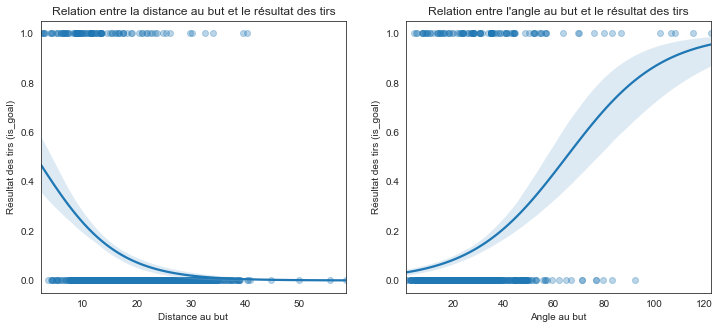

In [348]:
fig, axs = plt.subplots(1, 2, figsize=(14, 6))

# Avg outcome of shots from different distances
sns.regplot(x='distance_to_goal', y='is_goal', data=data.head(1000), logistic=True, scatter_kws={'alpha':0.3}, ax=axs[0])
axs[0].set_title('Relation entre la distance au but et le résultat des tirs')
axs[0].set_xlabel('Distance au but')
axs[0].set_ylabel('Résultat des tirs (is_goal)')

# Avg outcome of shots from different angles
sns.regplot(x='angle_to_goal', y='is_goal', data=data.head(1000), logistic=True, scatter_kws={'alpha':0.3}, ax=axs[1])
axs[1].set_title('Relation entre l\'angle au but et le résultat des tirs')
axs[1].set_xlabel('Angle au but')
axs[1].set_ylabel('Résultat des tirs (is_goal)')

plt.show()


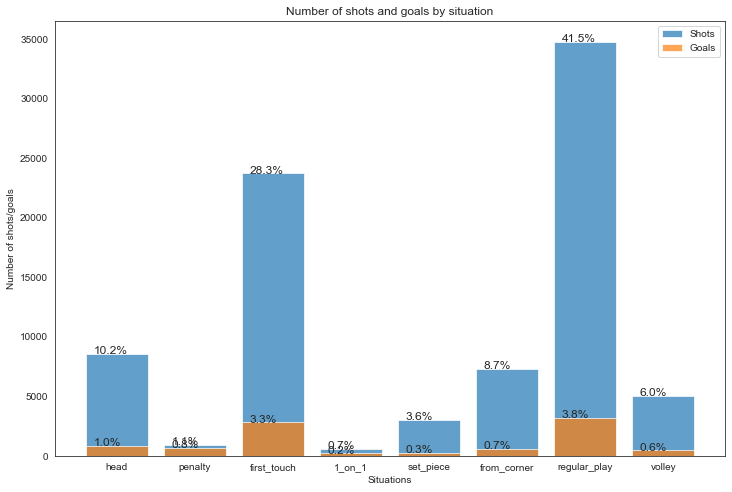

In [363]:
shot_data = data

fig, ax = plt.subplots(figsize=(12, 8))

# Shots situation
situations = ['head', 'penalty', 'first_touch', '1_on_1', 'set_piece', 'from_corner', 'regular_play', 'volley']

total_shots = []
total_goals = []

# Number shots and goals for each situation
for situation in situations:
    total_shots.append(shot_data[situation].sum())
    total_goals.append(shot_data[shot_data[situation] & (shot_data['is_goal'] == 1)].shape[0])

# array of total shots and goals
shot_percentages = np.array(total_shots) 
goal_percentages = np.array(total_goals)

positions = np.arange(len(situations))

plt.bar(positions, shot_percentages, label='Shots', alpha=0.7)
plt.bar(positions, goal_percentages, label='Goals', alpha=0.7)

# afficher le pourcentage dans chaque barre
for i in range(len(positions)):
    plt.text(x=positions[i]-0.3, y=shot_percentages[i]+0.5, s=f"{np.round(shot_percentages[i]/ np.sum(total_shots) *100, 1)}%", size=12)
    plt.text(x=positions[i]-0.3, y=goal_percentages[i]+0.5, s=f"{np.round(goal_percentages[i]/ np.sum(total_shots) *100,1)}%", size=12)


plt.xlabel('Situations')
plt.ylabel('Number of shots/goals')
plt.title('Number of shots and goals by situation')
plt.xticks(positions, situations)
plt.legend()

plt.show()


/Users/thomassinapi/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


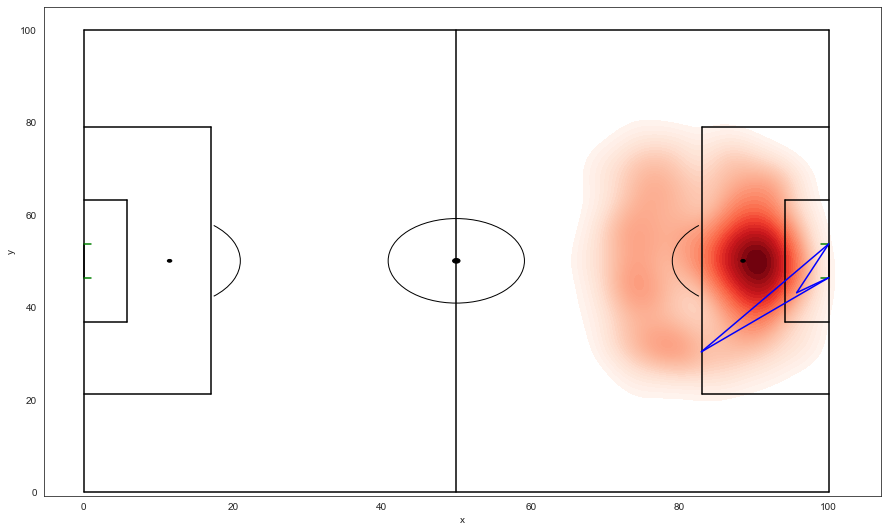

In [370]:
# Create figure
fig, ax = plt.subplots(figsize=(15, 9))

# Pitch Outline & Centre Line
plt.plot([0, 0], [0, 100], color="black")
plt.plot([0, 100], [100, 100], color="black")
plt.plot([100, 100], [100, 0], color="black")
plt.plot([100, 0], [0, 0], color="black")
plt.plot([50, 50], [0, 100], color="black")

# Left Penalty Area
plt.plot([17, 0], [21.1, 21.1], color="black")
plt.plot([17, 0], [78.9, 78.9], color="black")
plt.plot([17, 17], [21.1, 78.9], color="black")

# Right Penalty Area
plt.plot([83, 100], [21.1, 21.1], color="black")
plt.plot([83, 100], [78.9, 78.9], color="black")
plt.plot([83, 83], [21.1, 78.9], color="black")

# Left 6-yard Box
plt.plot([0, 5.8], [36.8, 36.8], color="black")
plt.plot([5.8, 5.8], [36.8, 63.2], color="black")
plt.plot([5.8, 0], [63.2, 63.2], color="black")

# Right 6-yard Box
plt.plot([100, 94.2], [36.8, 36.8], color="black")
plt.plot([94.2, 94.2], [36.8, 63.2], color="black")
plt.plot([94.2, 100], [63.2, 63.2], color="black")

# Prepare Circles
centreCircle = plt.Circle((50, 50), 9.15, color="black", fill=False)
centreSpot = plt.Circle((50, 50), 0.5, color="black")
leftPenSpot = plt.Circle((11.5, 50), 0.3, color="black")
rightPenSpot = plt.Circle((88.5, 50), 0.3, color="black")

# Draw Circles
ax.add_patch(centreCircle)
ax.add_patch(centreSpot)
ax.add_patch(leftPenSpot)
ax.add_patch(rightPenSpot)

# Prepare Arcs
leftArc = patches.Arc((11, 50), height=20, width=20, angle=0, theta1=310, theta2=50, color="black")
rightArc = patches.Arc((89, 50), height=20, width=20, angle=0, theta1=130, theta2=230, color="black")

# Draw Arcs
ax.add_patch(leftArc)
ax.add_patch(rightArc)

# Draw Goal Posts and Lines
plt.plot([0, 0], [46.35, 53.65], color="black")
plt.plot([100, 100], [46.35, 53.65], color="black")
plt.plot([0, 1], [46.35, 46.35], color="green")
plt.plot([0, 1], [53.65, 53.65], color="green")
plt.plot([99, 100], [46.35, 46.35], color="green")
plt.plot([99, 100], [53.65, 53.65], color="green")

# draw the first 100 shots on the pitch of data (red if goal, blue if not) en croix pas en point

# for i in range(10):
#     if data['is_goal'][i] == 1:
#         plt.plot(data['x'][i], data['y'][i], "x", color = 'red')
#     else:
#         plt.plot(data['x'][i], data['y'][i],"x", color = 'blue')




# create a heatmap of the shots
import seaborn as sns
wpen = data
wpen = wpen.head(1000)
sns.set_style("white")
sns.kdeplot(wpen['x'], wpen['y'], shade = 'True', n_levels = 50, cmap = 'Reds')

# Trace the shots with the line to the posts

for i in range(20):
    if data['is_goal'][i] == 1:
        plt.plot([data['x'][i], 100], [data['y'][i], 46.35], color = 'blue')
        plt.plot([data['x'][i], 100], [data['y'][i], 53.65], color = 'blue')

## value average position des tirs 10 premiers tisfrom corner 

# plt.plot(data.head(z)['x'][data.head(z)['from_corner'] == 1].mean(), data.head(z)['y'][data.head(z)['from_corner'] == 1].mean(), "x", color = 'red')


plt.show()

In [412]:
data_pen = data[data['penalty'] == 1]

# supprimer colonnes de data_pen

data_pen = data_pen.drop(['head', 'penalty', 'first_touch', '1_on_1', 'set_piece', 'from_corner', 'regular_play', 'volley', "on_good_foot"], axis=1)


X_pen = data_pen.drop(['is_goal'], axis=1)
y_pen = data_pen['is_goal']

X_train_pen, X_test_pen, y_train_pen, y_test_pen = train_test_split(X_pen, y_pen, test_size=0.2, random_state=7)

from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

logreg = LogisticRegression()
logreg.fit(X_train_pen, y_train_pen)

y_pred_pen = logreg.predict(X_test_pen)
print('Accuracy of logistic regression classifier on test set: {:.2f}'.format(accuracy_score(y_test_pen, y_pred_pen)))

# moyenne de chance de marquer un penalty
print(len(data_pen[data_pen['is_goal'] == 1])/len(data_pen))

# attribuer une valeur à chaque tir
data_pen['xG'] = logreg.predict_proba(X_pen)[:,1]



data_pen.sort_values(by = 'xG', ascending = True)

# Afficher les coefficients pour chaque attribut
coefficients = pd.DataFrame({
    'Feature': X_train_pen.columns,
    'Coefficient': logreg.coef_[0]
})

# Trier les coefficients par valeur absolue pour voir les plus influents
coefficients['Absolute Coefficient'] = np.abs(coefficients['Coefficient'])
coefficients = coefficients.sort_values(by='Absolute Coefficient', ascending=False)

# Afficher les coefficients
print(coefficients)

# ajouter is_goal à data_pen

data_pen.sort_values(by = 'xG', ascending = True)

data_pen['xG'].describe()




Accuracy of logistic regression classifier on test set: 0.78
0.7588105726872246
            Feature  Coefficient  Absolute Coefficient
9     angle_to_goal    -0.755309              0.755309
8  distance_to_goal     0.509967              0.509967
3                 x     0.418976              0.418976
4                 y    -0.298982              0.298982
5       left_footed     0.159369              0.159369
6      right_footed    -0.149890              0.149890
0         period_id    -0.094882              0.094882
1               min     0.001677              0.001677
2               sec    -0.001259              0.001259
7         free_kick     0.000000              0.000000


count    908.000000
mean       0.755254
std        0.047539
min        0.483597
25%        0.744539
50%        0.760548
75%        0.771966
max        0.888427
Name: xG, dtype: float64

----

In [269]:


# create the labels
X = data.drop(['is_goal'], axis=1)
y = data['is_goal']


# select the features
#X = X[['distance_to_goal', 'angle_to_goal', 'on_good_foot', '1_on_1', 'from_corner', 'right_footed', 'left_footed']]

# Split the data into training and testing sets and validation sets (70% training,  20% testing, 10% validation)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=7)
X_test, X_val, y_test, y_val = train_test_split(X_test, y_test, test_size=0.33, random_state=7)


# size of the sets
print("Training set size: ", len(X_train), "---", len(X_train)/len(X)*100, "%")
print("Testing set size: ", len(X_test), "---", len(X_test)/len(X)*100, "%")
print("Validation set size: ", len(X_val), "---", len(X_val)/len(X)*100, "%")

Training set size:  35000 --- 70.0 %
Testing set size:  10050 --- 20.1 %
Validation set size:  4950 --- 9.9 %


In [375]:
from sklearn.linear_model import LogisticRegression
# import Random Forest
from sklearn.ensemble import RandomForestClassifier

model = LogisticRegression()
model.fit(X_train, y_train)

# Prédire les probabilités d'obtenir un but (xG) pour les tirs dans l'ensemble de test
xG_predictions = model.predict_proba(X_test)[:, 1]

print(xG_predictions)

from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score, roc_curve, roc_auc_score

# Calculer les métriques de régression
mse = mean_squared_error(y_test, xG_predictions)
mae = mean_absolute_error(y_test, xG_predictions)
r2 = r2_score(y_test, xG_predictions)

# Calculer les métriques de classification (ROC et AUC)
fpr, tpr, thresholds = roc_curve(y_test, xG_predictions)
auc = roc_auc_score(y_test, xG_predictions)

# Afficher les métriques
print("Mean Squared Error (MSE): {:.4f}".format(mse))
print("Mean Absolute Error (MAE): {:.4f}".format(mae))
print("R² (R-squared): {:.4f}".format(r2))
print("AUC (Area Under the ROC Curve): {:.4f}".format(auc))

[0.75427156 0.0251074  0.47404987 ... 0.07948464 0.01462887 0.02020648]
Mean Squared Error (MSE): 0.0733
Mean Absolute Error (MAE): 0.1495
R² (R-squared): 0.2014
AUC (Area Under the ROC Curve): 0.8053


/Users/thomassinapi/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


###### <span style="font-family:Georgia; font-size:2em;"> ***Optimization of the HyperParameters:*** </span>

In [376]:
from sklearn.model_selection import GridSearchCV

# Définir les hyperparamètres à optimiser
param_grid = {
    'penalty': ['l2'],
    'C': [100],
    'max_iter': [100],
    'solver': ['liblinear']
}

# Initialiser le modèle de régression logistique
model = LogisticRegression()

# Initialiser GridSearchCV
grid_search = GridSearchCV(estimator=model, param_grid=param_grid, scoring='roc_auc', cv=5)

# Exécuter la recherche sur grille sur les données d'entraînement
grid_search.fit(X_train, y_train)

# Afficher les meilleurs paramètres trouvés
print("Meilleurs paramètres:", grid_search.best_params_)

# Utiliser le modèle avec les meilleurs paramètres pour faire des prédictions
best_model = grid_search.best_estimator_
xG_predictions = best_model.predict_proba(X_test)[:, 1]



mse = mean_squared_error(y_test, xG_predictions)
mae = mean_absolute_error(y_test, xG_predictions)
r2 = r2_score(y_test, xG_predictions)

fpr, tpr, thresholds = roc_curve(y_test, xG_predictions)
auc = roc_auc_score(y_test, xG_predictions)

# Print metrics
print("Mean Squared Error (MSE): {:.4f}".format(mse))
print("Mean Absolute Error (MAE): {:.4f}".format(mae))
print("R² (R-squared): {:.4f}".format(r2))
print("AUC (Area Under the ROC Curve): {:.4f}".format(auc))


Meilleurs paramètres: {'C': 100, 'max_iter': 100, 'penalty': 'l2', 'solver': 'liblinear'}
Mean Squared Error (MSE): 0.0730
Mean Absolute Error (MAE): 0.1484
R² (R-squared): 0.2048
AUC (Area Under the ROC Curve): 0.8077


In [377]:
from sklearn.model_selection import cross_val_score

# Définir le modèle de régression logistique
model = LogisticRegression(C = 100, penalty = 'l2', solver = 'liblinear', max_iter = 100)

# Effectuer une validation croisée avec 5 plis
cv_scores = cross_val_score(model, X_train, y_train, cv=5, scoring='roc_auc')

# Afficher les scores de chaque pli
print("Scores de la validation croisée:", cv_scores)

# Afficher la moyenne des scores
print("Moyenne des scores de la validation croisée:", cv_scores.mean())


Scores de la validation croisée: [0.80618119 0.80916059 0.81011868 0.8041901  0.81346695]
Moyenne des scores de la validation croisée: 0.8086235042106921


             Feature  Coefficient  Absolute Coefficient
12           penalty     1.485718              1.485718
15       from_corner    -1.212808              1.212808
10            1_on_1     0.714486              0.714486
7               head    -0.698216              0.698216
14         set_piece    -0.659829              0.659829
11      regular_play    -0.564261              0.564261
5             volley    -0.553271              0.553271
9       right_footed     0.446777              0.446777
13         free_kick     0.366763              0.366763
8        left_footed     0.328383              0.328383
6        first_touch    -0.206943              0.206943
18      on_good_foot    -0.163221              0.163221
16  distance_to_goal    -0.137712              0.137712
0          period_id    -0.057054              0.057054
17     angle_to_goal     0.016437              0.016437
3                  x     0.002808              0.002808
4                  y     0.001759              0

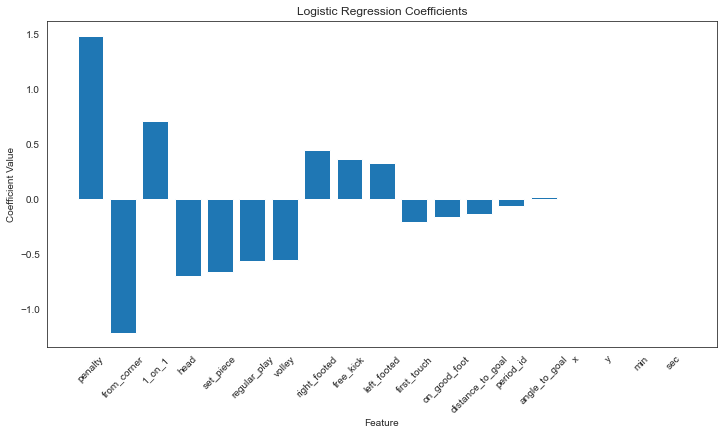

In [273]:
import matplotlib.pyplot as plt

# Extraire les coefficients et les noms de features
coefficients = model.coef_[0]
feature_names = X_train.columns

# Créer un DataFrame pour afficher les coefficients avec les noms de features
coefficients_df = pd.DataFrame({'Feature': feature_names, 'Coefficient': coefficients})

# Trier le DataFrame par valeur absolue des coefficients pour une meilleure visualisation
coefficients_df['Absolute Coefficient'] = coefficients_df['Coefficient'].abs()
coefficients_df = coefficients_df.sort_values(by='Absolute Coefficient', ascending=False)

# Afficher les coefficients
print(coefficients_df)

# Tracer les coefficients
plt.figure(figsize=(12, 6))
plt.bar(coefficients_df['Feature'], coefficients_df['Coefficient'])
plt.xlabel('Feature')
plt.ylabel('Coefficient Value')
plt.title('Logistic Regression Coefficients')
plt.xticks(rotation=45)
plt.show()


In [157]:

# Prédire les probabilités d'obtenir un but (xG) pour l'ensemble de données
xG_predictions = model.predict_proba(data.drop(['is_goal'], axis=1))[:, 1]

# Ajouter la colonne xG au DataFrame
data['xG'] = xG_predictions

# Afficher le DataFrame avec la colonne xG


In [162]:
# affiche les lignes penalty et but
pen = data[(data['head'] == 1) & (data['is_goal'] == 1) & (data['set_piece'] == 1)]

# trier xG par ordre croissant
pen.sort_values(by='xG', ascending=False)

,period_id,min,sec,x,y,volley,first_touch,head,left_footed,right_footed,1_on_1,regular_play,penalty,free_kick,set_piece,from_corner,is_goal,distance_to_goal,angle_to_goal,on_good_foot,xG
31716,2,63,32,96.9,50.9,False,True,True,False,False,False,False,False,False,True,False,True,3.228002,97.308793,0,0.465078
9272,2,90,47,97.2,52.4,False,True,True,False,False,False,False,False,False,True,False,True,3.687818,89.222182,0,0.425791
21400,2,65,55,96.3,49.7,False,True,True,False,False,False,False,False,False,True,False,True,3.712142,89.029607,0,0.418183
21845,2,59,4,96.2,49.7,False,True,True,False,False,False,False,False,False,True,False,True,3.811824,87.507534,0,0.399715
29840,1,17,28,95.4,49.4,False,True,True,False,False,False,False,False,False,True,False,True,4.638965,76.281354,0,0.337734
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3353,2,81,50,85.9,49.3,False,True,True,False,False,False,False,False,False,True,False,True,14.117365,28.962512,0,0.059013
47334,2,61,21,85.3,51.3,False,True,True,False,False,False,False,False,False,True,False,True,14.757371,27.692841,0,0.051540
13381,2,62,34,93.6,38.2,False,True,True,False,False,False,False,False,False,True,False,True,13.423859,15.640432,0,0.051289
30686,2,88,18,96.6,64.5,False,True,True,False,False,False,False,False,False,True,False,True,14.893287,6.788991,0,0.039259


Mean Squared Error : 0.0753


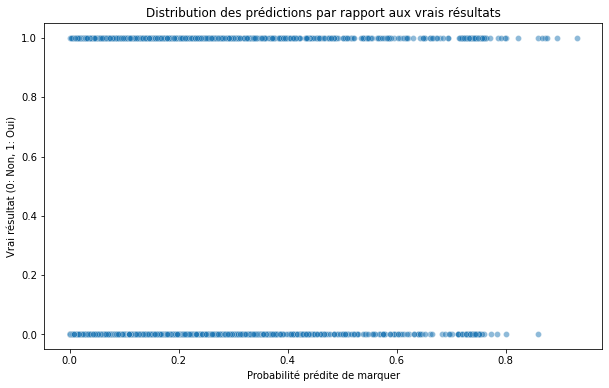

In [98]:
# Calculez et affichez la performance du modèle (par exemple, Mean Squared Error)
mse = mean_squared_error(y_test, y_pred_proba)
print(f"Mean Squared Error : {mse:.4f}")

# Affichez la distribution des prédictions par rapport aux vrais résultats
plt.figure(figsize=(10, 6))
sns.scatterplot(x=y_pred_proba, y=y_test, alpha=0.5)
plt.xlabel('Prédictions xG')
plt.ylabel('Goal ? (0: No, 1: Yes)')
plt.title('Distribution des prédictions par rapport aux vrais résultats')
plt.show()


In [314]:
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score, roc_curve, roc_auc_score

# Créer et entraîner le modèle MLP
mlp_model = MLPClassifier(hidden_layer_sizes=(100,), max_iter=100, activation='relu', solver='adam', random_state=7)
mlp_model.fit(X_train, y_train)

# Prédire les probabilités d'obtenir un but (xG) pour les tirs dans l'ensemble de test
xG_predictions = mlp_model.predict_proba(X_test)[:, 1]

# Calculer les métriques de régression
mse2 = mean_squared_error(y_test, xG_predictions)
mae2 = mean_absolute_error(y_test, xG_predictions)
r22 = r2_score(y_test, xG_predictions)

# Calculer les métriques de classification (ROC et AUC)
fpr, tpr, thresholds = roc_curve(y_test, xG_predictions)
auc2 = roc_auc_score(y_test, xG_predictions)

# Afficher les métriques
print("Mean Squared Error (MSE): {:.4f}".format(mse2))
print("Mean Absolute Error (MAE): {:.4f}".format(mae2))
print("R² (R-squared): {:.4f}".format(r22))
print("AUC (Area Under the ROC Curve): {:.4f}".format(auc2))


Mean Squared Error (MSE): 0.0759
Mean Absolute Error (MAE): 0.1700
R² (R-squared): 0.1732
AUC (Area Under the ROC Curve): 0.8034


In [315]:
# comparaison des modèles

# Créer un DataFrame pour stocker les résultats
results_df = pd.DataFrame(columns=['Model', 'MSE', 'MAE', 'R²', 'AUC'])

# Ajouter les résultats du modèle de régression logistique
results_df = results_df.append({'Model': 'Logistic Regression',
                                'MSE': mse,     
                                'MAE': mae,
                                'R²': r2,
                                'AUC': auc}, ignore_index=True)

# Ajouter les résultats du modèle MLP
results_df = results_df.append({'Model': 'MLP',
                                'MSE': mse2,                             
                                'MAE': mae2,
                                'R²': r22,
                                'AUC': auc2}, ignore_index=True)

# Afficher les résultats
results_df


,Model,MSE,MAE,R²,AUC
0,Logistic Regression,0.072957,0.148381,0.204795,0.807749
1,MLP,0.075854,0.169952,0.173226,0.803393


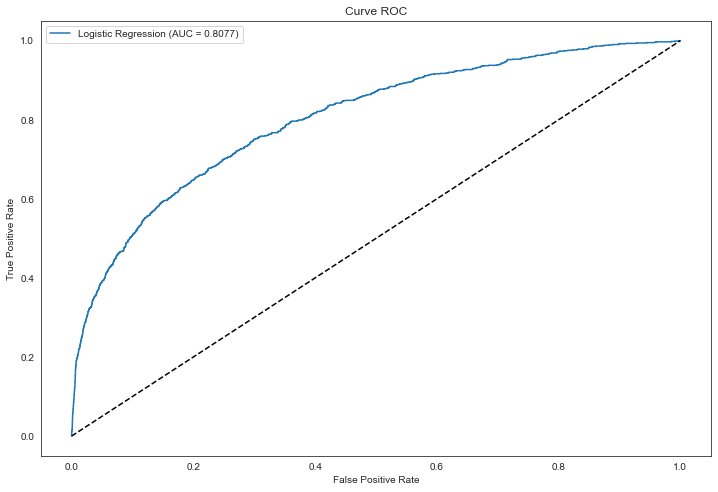

In [331]:
## Roc curve

fig, ax = plt.subplots(figsize=(12, 8))

plt.plot(fpr, tpr, label='Logistic Regression (AUC = {:.4f})'.format(auc))
# function y = x
plt.plot([0, 1], [0, 1], color='black', linestyle='--')
plt.title('Curve ROC')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()
plt.show()


In [381]:
# Évaluer la performance du modèle
from sklearn.metrics import accuracy_score, classification_report

threshold = 0.5

accuracy = accuracy_score(y_test, (xG_predictions >= threshold).astype(int))
print("Précision du modèle : {:.2f}".format(accuracy))

# Afficher un rapport de classification
report = classification_report(y_test, (xG_predictions >= 0.5).astype(int))
print(report)

Précision du modèle : 0.91
              precision    recall  f1-score   support

       False       0.92      0.99      0.95      9023
        True       0.68      0.22      0.33      1027

    accuracy                           0.91     10050
   macro avg       0.80      0.60      0.64     10050
weighted avg       0.89      0.91      0.89     10050



<AxesSubplot:>

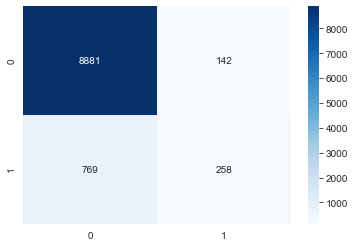

In [325]:
#confusion matrix with sns
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, y_pred)
cm

# heatmap
sns.heatmap(cm, annot=True, fmt='g', cmap='Blues')

https://statsbomb.com/news/statsbomb-release-expected-goals-with-shot-impact-height/

#### <center><span style="font-family:Georgia; font-size:2em;"> ***FINAL SCORE:*** </span><center>

In [386]:
# final score model on validation set

model = LogisticRegression(C = 100, penalty = 'l2', solver = 'liblinear', max_iter = 100)
model.fit(X_train, y_train)

# Prédire les probabilités d'obtenir un but (xG) pour les tirs dans l'ensemble de test
xG_predictions = model.predict_proba(X_val)[:, 1]

# Calculer les métriques de régression
mse = mean_squared_error(y_val, xG_predictions)
mae = mean_absolute_error(y_val, xG_predictions)
r2 = r2_score(y_val, xG_predictions)

# Calculer les métriques de classification (ROC et AUC)
fpr, tpr, thresholds = roc_curve(y_val, xG_predictions)
auc = roc_auc_score(y_val, xG_predictions)

# Afficher les métriques
print("Mean Squared Error (MSE): {:.4f}".format(mse))
print("Mean Absolute Error (MAE): {:.4f}".format(mae))
print("R² (R-squared): {:.4f}".format(r2))
print("AUC (Area Under the ROC Curve): {:.4f}".format(auc))

# Évaluer la performance du modèle
from sklearn.metrics import accuracy_score, classification_report

threshold = 0.5

accuracy = accuracy_score(y_val, (xG_predictions >= threshold).astype(int))
print("Précision du modèle : {:.2f}".format(accuracy))

# Afficher un rapport de classification
report = classification_report(y_val, (xG_predictions >= threshold).astype(int))
print(report)

Mean Squared Error (MSE): 0.0750
Mean Absolute Error (MAE): 0.1493
R² (R-squared): 0.1918
AUC (Area Under the ROC Curve): 0.7983
Précision du modèle : 0.91
              precision    recall  f1-score   support

       False       0.92      0.99      0.95      4438
        True       0.67      0.23      0.34       512

    accuracy                           0.91      4950
   macro avg       0.79      0.61      0.64      4950
weighted avg       0.89      0.91      0.89      4950

